In [2]:
import yfinance as yf
import pandas as pd
import numpy as np


In [3]:
df = yf.download('MSFT, PG, CAT, WMT, NKE, NKE, XOM, MS, AAPL, BA, PFE', start = '2022-01-02', end = '2022-08-02')


[*********************100%***********************]  10 of 10 completed


In [4]:
df1 = df['Adj Close']

In [5]:
data = df1.pct_change()[1:]

In [6]:
data.head()

,AAPL,BA,CAT,MS,MSFT,NKE,PFE,PG,WMT,XOM
Date,,,,,,,,,,
2022-01-04,-0.012692,0.027759,0.053527,0.040623,-0.017147,0.010445,-0.037423,0.003499,-0.018320,0.037614
2022-01-05,-0.026600,-0.002621,0.007658,-0.024746,-0.038388,-0.024881,0.020172,0.004527,0.013521,0.012437
2022-01-06,-0.016693,-0.008119,0.010193,0.017112,-0.007902,-0.007458,-0.014201,-0.008404,-0.002779,0.023521
2022-01-07,0.000988,0.019684,0.009910,0.006092,0.000510,-0.025273,0.016047,-0.000553,0.009546,0.008197
2022-01-10,0.000116,-0.028724,-0.011374,0.000769,0.000732,-0.041600,0.009332,-0.013641,-0.001932,-0.005952


In [7]:
data.describe

<bound method NDFrame.describe of                 AAPL        BA       CAT        MS      MSFT       NKE  \
Date                                                                     
2022-01-04 -0.012692  0.027759  0.053527  0.040623 -0.017147  0.010445   
2022-01-05 -0.026600 -0.002621  0.007658 -0.024746 -0.038388 -0.024881   
2022-01-06 -0.016693 -0.008119  0.010193  0.017112 -0.007902 -0.007458   
2022-01-07  0.000988  0.019684  0.009910  0.006092  0.000510 -0.025273   
2022-01-10  0.000116 -0.028724 -0.011374  0.000769  0.000732 -0.041600   
...              ...       ...       ...       ...       ...       ...   
2022-07-26 -0.008826 -0.004597 -0.003190 -0.021320 -0.026774 -0.037335   
2022-07-27  0.034235  0.001090  0.022182  0.021290  0.066852  0.025285   
2022-07-28  0.003572  0.019220  0.013981  0.014865  0.028541  0.040516   
2022-07-29  0.032793  0.001383  0.055420  0.016275  0.015665  0.023969   
2022-08-01 -0.006153  0.061264 -0.017100 -0.002491 -0.009724 -0.005395   

   

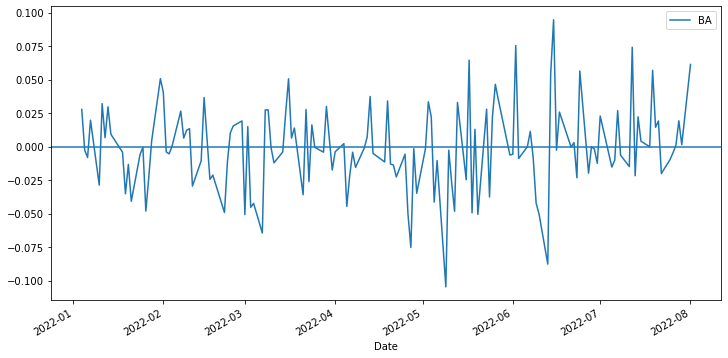

In [8]:
data[['BA']].plot(figsize = (12,6)).axhline(y=0);

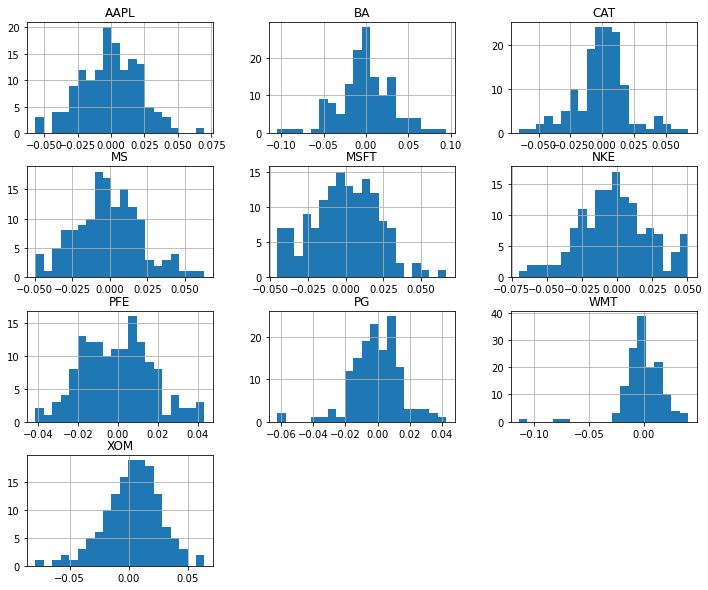

In [9]:
data.hist(bins = 20, figsize = (12,10));

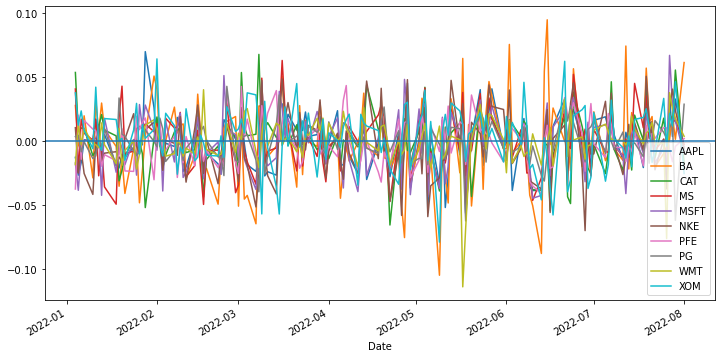

In [10]:
# plot all sticks
data.plot(figsize = (12,6)).axhline(y=0);

In [11]:
# find mean
means = data.describe()[1:2].values
means

array([[-5.71972105e-04, -9.30577890e-04, -7.06031815e-05,
        -8.09912762e-04, -1.01154824e-03, -2.18494523e-03,
        -4.66465560e-04, -6.68355348e-04, -3.84531798e-04,
         3.18388373e-03]])

In [12]:
# cov matrix
data.cov()

,AAPL,BA,CAT,MS,MSFT,NKE,PFE,PG,WMT,XOM
AAPL,0.000480,0.000400,0.000147,0.000290,0.000399,0.000391,0.000109,0.000120,0.000114,0.000091
BA,0.000400,0.001009,0.000292,0.000376,0.000300,0.000421,0.000069,0.000072,0.000035,0.000107
CAT,0.000147,0.000292,0.000471,0.000229,0.000144,0.000239,0.000067,-0.000016,0.000014,0.000280
MS,0.000290,0.000376,0.000229,0.000470,0.000282,0.000333,0.000113,0.000099,0.000047,0.000133
MSFT,0.000399,0.000300,0.000144,0.000282,0.000497,0.000383,0.000113,0.000109,0.000106,0.000054
NKE,0.000391,0.000421,0.000239,0.000333,0.000383,0.000631,0.000093,0.000121,0.000119,0.000107
PFE,0.000109,0.000069,0.000067,0.000113,0.000113,0.000093,0.000310,0.000102,0.000048,0.000087
PG,0.000120,0.000072,-0.000016,0.000099,0.000109,0.000121,0.000102,0.000240,0.000116,-0.000017
WMT,0.000114,0.000035,0.000014,0.000047,0.000106,0.000119,0.000048,0.000116,0.000333,0.000031
XOM,0.000091,0.000107,0.000280,0.000133,0.000054,0.000107,0.000087,-0.000017,0.000031,0.000556


In [13]:
# creat portfolieos
p = np.random.rand(10)
q = p.sum()

#portfolio

port = p/q
port.sum() # = 1.0

0.9999999999999998

In [14]:
port

array([0.02184515, 0.11604596, 0.12831567, 0.09451678, 0.13482326,
       0.00156711, 0.14084036, 0.1490689 , 0.12254277, 0.09043403])

In [15]:
means

array([[-5.71972105e-04, -9.30577890e-04, -7.06031815e-05,
        -8.09912762e-04, -1.01154824e-03, -2.18494523e-03,
        -4.66465560e-04, -6.68355348e-04, -3.84531798e-04,
         3.18388373e-03]])

In [16]:
# mean return of this portfolio
MR = np.dot(means, port)
MR

array([-0.00027042])

In [17]:
# variance of this portfolio
# 1. covariance matrix
var = np.dot(port,data.cov().dot(port))
var

0.00016146627758897012